3)	Probability and uncertainty. (Ideally use a jupyter notebook). Note: ***dark red bold*** keywords are probabilistic or statistical term.

a)	Airlines are commonly known to utilize overbooking to earn extra profits or avoid losses over the fact that not all passengers will show up on boarding day. We will use a simple scenario here to demonstrate how airlines might do so.
* i)	The passenger travel in this scenario is assumed to be alone. Factors such as weather, festival season, time of the flight and other external factors are assumed to not affect our model.
* ii)	Historically passenger showed up rate is 80%
* iii)	The number of tickets to be sold without overbooking is 200, and the cost of a ticket is \\$120.
* iv)	The management of the airline is planning to overbook the seats by additional 50 tickets to achieve full capacity and avoid losses. Hence the total ticket to be sold is 250. (0.8x = 200, hence x = 250).
* v)	However the risk is if more than 200 passengers showed on boarding day, the airline must compensate each bumped passenger by \\$300.

b)	The revenue without overbook is \\$24,000 (\\$120\*200), while for best case scenario where 250 tickets are sold and 50 no show passengers is \\$30,000 (\\$120\*250).  Show the revenue calculation for worst case scenario.

c)	Using the python library from **matplotlib/seaborn** and **scipy.stats** write codes to plot the ***probability mass function (pmf)*** for the above scenario. Hint: Your diagram should closely resemble the diagram below.


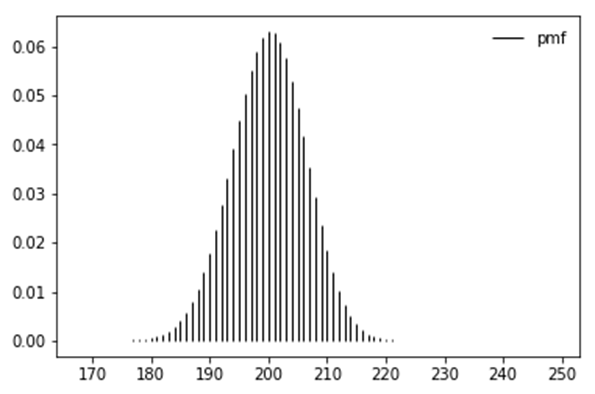

d)	What is the probability of passengers showed up for:
* i)	200
* ii)	250

e)	What is the ***expected revenue*** of 250 tickets sold?

f)	Is 250 overbook tickets the most optimal number? Run a simulation of ***expected revenue*** from 201 to 260 tickets sold.

g)	Plot the number of tickets sold against expected revenue and draw a vertical line to mark the optimal number of tickets sold.

h)	By using the optimal number of tickets from **(f)** and with the shown up rate of 80%, generate 10,000 random numbers to simulate the possible number of passengers that show up . (hint : .rvs(n, p, size=10000))

i)	What is the min, max and 95% percentile of the number of passengers showing up from **(g)**?

j)	What if the passenger isn’t traveling alone, describe how it affects the model.

k)	For the solutions, you **should** as much as possible minimize the usage of loop and instead be replaced with matrix computation (i.e numpy multiplication). 

l)	From your observation or research on Involve Asia, how do you think this scenario relates to the business model?


---
# ANSWER

---
# b)	The revenue without overbook is \\$24,000 (\\$120\*200), while for best case scenario where 250 tickets are sold and 50 no show passengers is \\$30,000 (\\$120\*250).  Show the revenue calculation for worst case scenario.


Revenue calculation for worst case scenario:

Sales from 250 tickets sold = \\$30,000

Compensation for 50 bumped passengers = \\$15,000 (\\$300\*50)

**Revenue for worst case scenario = (Sales from 250 tickets sold) - (Compensation for 50 bumped passengers) = \\$15,000 (\\$30,000 - \\$15,000)**

The above is true with the assumption of 250 tickets sold and 250 passengers showed up. Otherwise, the worst case scenario would be \\$0 where no ticket was sold.

---
# c)	Using the python library from **matplotlib/seaborn** and **scipy.stats** write codes to plot the ***probability mass function (pmf)*** for the above scenario. Hint: Your diagram should closely resemble the diagram below.


This question is described as a binomial distribution problem with only 2 outcomes:
* Passenger showed up
* No passenger showed up

The probability mass function for a binomial distribution is:

$ P(k) = \binom{n}{k} p^{k}(1-p)^{n-k} $

for:

$k \in \{0,1,2,3..., n\}, 0 \le p \le 1 $

where:

$ P(k) = $ binomial probability

$ k = $ number of times for a specific outcome within n trials = number of passenger who show up

$ n = $ number of trials = number of passengers

$ p = $ probability of success for a single trial

$ q = 1 - p$ probability of failure in a single trial

Historically, passenger show up rate is 80%

$ p = 0.80$



Text(0.5, 1.0, 'Probability Mass Function (PMF)')

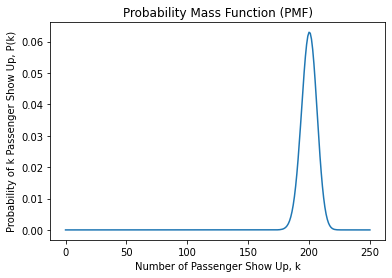

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import binom
n = 250
p = 0.8
k = np.arange(0,251)

P = binom.pmf(k,n,p)

sb.lineplot(x = k,y = P)
plt.xlabel("Number of Passenger Show Up, k")
plt.ylabel("Probability of k Passenger Show Up, P(k)")
plt.title("Probability Mass Function (PMF)")

Scaling the x-axis to compare with the reference plot given.

Text(0.5, 1.0, 'Probability Mass Function (PMF)')

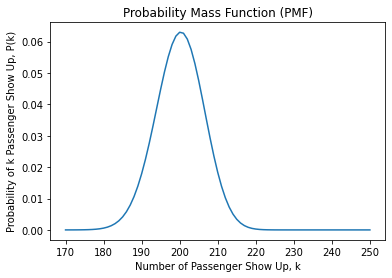

In [2]:
n = 250
p = 0.8
k = np.arange(170,251)

P = binom.pmf(k,n,p)

sb.lineplot(x = k,y = P)
plt.xlabel("Number of Passenger Show Up, k")
plt.ylabel("Probability of k Passenger Show Up, P(k)")
plt.title("Probability Mass Function (PMF)")

---
# d)	What is the probability of passengers showed up for:
* i)	200
* ii)	250

In [3]:
# For case i: 200 passengers showed up:
result_1 = binom.pmf(k=200,n=250,p=0.8)
print("Probability for case i: "+str(result_1))

# For case ii: 250 passengers showed up:
result_2 = binom.pmf(k=250,n=250,p=0.8)
print("Probability for case ii: "+str(result_2))

Probability for case i: 0.06296802394481274
Probability for case ii: 5.922386521532938e-25


Therefore, the probability for **case i** is about **0.062968**

Therefore, the probability for **case ii** is about **5.9223865e-25** (could be approximated to 0)

---
# e) What is the expected revenue of 250 tickets sold?

The expected revenue is described as the equation below:

$E(x) = \sum{x_{i}P(x_{i})}$

where:

$E(x) = $ the expected revenue

$x_{i} = $ the revenue corresponding to the scenario (how many passengers showed up)

$P(x_{i}) = $ the probability of the scenario (how many passengers showed up)


In [4]:
def exp_revenue(n):
    expected_revenue = 0

    for k in range(251):
        expected_revenue = expected_revenue + (120*k - 300*max(0, k-200))*binom.pmf(k,n,p=0.8)
    return expected_revenue

print("Expected Revenue (250 tickets sold): $" + str(round(exp_revenue(250),2)))


Expected Revenue (250 tickets sold): $23244.38


Therefore, the expected revenue of 250 ticket sold is **\\$23,244.38**

---

# f)	Is 250 overbook tickets the most optimal number? Run a simulation of ***expected revenue*** from 201 to 260 tickets sold.




In [5]:
# reusing the exp_revenue function from the previous question
max_rev = 0

sim_rev = pd.DataFrame({'k':np.arange(201, 261), 'exp_rev': np.vectorize(exp_revenue)(np.arange(201, 261))})
opti_k = sim_rev.loc[sim_rev['exp_rev'] == sim_rev['exp_rev'].max(), 'k'].values[0]
opti_exp_rev = sim_rev.loc[sim_rev['exp_rev'] == sim_rev['exp_rev'].max(), 'exp_rev'].values[0]

print("The most optimal number for tickets sold, k is " + str(opti_k) + " with the expected revenue of $" + str(round(opti_exp_rev,2)))

The most optimal number for tickets sold, k is 248 with the expected revenue of $23274.19


The optimal scenario:

Tickets sold, k = 248

Expeceted revenue = \\$23,274.19

---
# g) Plot the number of tickets sold against expected revenue and draw a vertical line to mark the optimal number of tickets sold.


Optimum Ticket Number Sold: 248.0


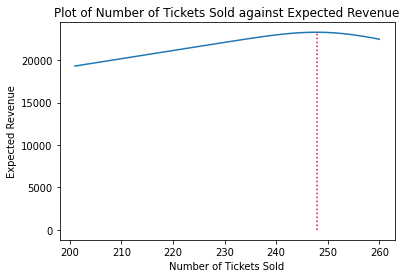

In [6]:
# visualize the simulation result
ax = sb.lineplot(x = sim_rev.k,y = sim_rev.exp_rev)
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
mode_idx = y.argmax()
ax.vlines(x[mode_idx], 0, y[mode_idx], color='crimson', ls=':')

plt.xlabel("Number of Tickets Sold")
plt.ylabel("Expected Revenue")
plt.title("Plot of Number of Tickets Sold against Expected Revenue")

print("Optimum Ticket Number Sold: " + str(x[mode_idx]))

---
# h) By using the optimal number of tickets from (f) and with the shown up rate of 80%, generate 10,000 random numbers to simulate the possible number of passengers that show up . (hint : .rvs(n, p, size=10000))


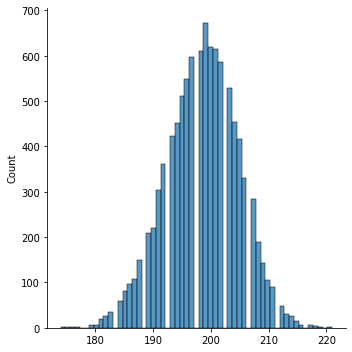

In [7]:
gen_num = binom.rvs(n = 248,p = 0.8, size = 10000, random_state = 0) # random state defined to ensure reproducibility

# visualizing the distrbution of the generated numbers
sb.displot(data=gen_num)

---
# i) What is the min, max and 95% percentile of the number of passengers showing up from (g)?


In [8]:
print("Min = " + str(np.min(gen_num)))
print("Max = " + str(np.max(gen_num)))
print("95% percentile = " + str(np.percentile(gen_num,95)))

Min = 174
Max = 221
95% percentile = 208.0


***Minimum = 174***

***Maximum = 221***

***95% percentile = 208.0***

---
# j) What if the passenger isn’t traveling alone, describe how it affects the model.

The ***binomial distribution model would become invalid*** as the occurrence of events would become dependent of each other (The showing or not showing of a passenger would affect the other passenger).

---
# k) For the solutions, you should as much as possible minimize the usage of loop and instead be replaced with matrix computation (i.e numpy multiplication).

Tried my best on it.

---
# l) From your observation or research on Involve Asia, how do you think this scenario relates to the business model?

